# Project 2 : An analysis of paleo-present climate data

This jupyter notebook contains the second project for the programming and data analytics module  
***

## Index  

1. Objetives
2. Used technologies
3. Theme of the project
4. import database
5. Analysis
6. Conclusions
7. References  

***

## Objetives  

1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present.  
2. Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)  
3. Examine Irish context:  
  o Climate change signals: (see Maynooth study: The emergence of a climate change  
  signal in long-term Irish meteorological observations - ScienceDirect)  
4. Fuse and analyse data from various data sources and format fused data set as a pandas  
  dataframe and export to csv and json formats.  
5. For all of the above variables, analyse the data, the trends and the relationships between  
  them (temporal leads/lags/frequency analysis).  
6. Predict global temperature anomaly over next few decades (synthesise data) and compare to  
  published climate models if atmospheric CO2 trends continue  
7. Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)  


***
## Used technologies  

**Numpy**  
Is used for numerical computation that allows you to work with large, multi-dimensional arrays and matrices of numerical data.  
It provides a wide range of mathematical functions to operate on these arrays, making it an essential tool for scientific computing, data analysis, and machine learning.  
To find out more:  
https://numpy.org/  

**Pandas**  
Is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. https://pandas.pydata.org/  

**Matplotlib**  
Is a plotting library for the Python programming language that provides a wide variety of high-quality 2D and 3D graphs and plots.
More of this:
https://matplotlib.org/

**Seaborn**  
Is a data visualization library in Python built on top of Matplotlib.
It provides a high-level interface for creating informative and statistical graphics.
https://seaborn.pydata.org/

**Scikit-learn**  
Offers a wide range of statistical and mathematical tools that operate on NumPy arrays. It includes functions for descriptive statistics, statistical tests, probability distributions, among others.  
https://scikit-learn.org/stable/

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

***

## Theme of the project  

The theme of the project is a brief analysis and review of a study presented in 2008 in the journal Nature in 2008 [1]. This study analyzed Antarctic ice cores to reconstruct past atmospheric carbon dioxide (CO2) levels.

Lüthi and his team used ice cores to examine how CO2 levels have varied over hundreds of thousands of years.  
Their findings revealed a significant relationship between changes in CO2 levels and temperature variations over past climate periods.  
They showed that changes in CO2 levels were closely related to changes in global temperature, supporting the idea that CO2 is an important driver of climate change.

This study provided valuable insight into how CO2 levels have fluctuated over Earth's history and how these changes have influenced climatic conditions.

CO2 emissions from fossil fuels have increased since the industrial revolution (i.e., since the mid-1700s) and, by the 1950s, the atmospheric concentration of CO2 had risen from 284 parts per million (ppm) to 300 ppm above pre-industrial levels, the highest level in at least 800,000 years (Luthi et al., 2008).[2]

For this study there were several limitations, such as the availability or accuracy of the data, since it covers a period of tens of thousands of years, but a series of conclusions were drawn that are intended to be replicated in the present project.


***

## Import database

In order to see this correlation between CO2 and temperature,several databases that collect this information will be used.  
All the databases used are located in the data subfolder.  

First of all, the necessary transformations must be established to obtain the information we need and from there,  
start the analysis, obtain conclusions and be able to visualize it in order to have a better understanding of the results obtained.  

The following databases are used for the project:

1) **Temp Data from Jouzel**  
     This file authored by French climate laureate Jean Jouzel shows how a detailed analysis of a specific ice core  
     in Antarctica reveals crucial information about past climatic changes, especially in relation to temperature. [3]  

2) **CO2 data from IPCC Report**  
     This provides the following: Composite of atmospheric CO2 records from Antarctic ice cores. [4]  
     This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.  

3) **A third database** related to objective item 3. The aim is to find a phenomenon that can be related to the previous ones.  
   It can be found at the following link:  
   https://www.met.ie/climate/available-data/long-term-data-sets/


***

## Analysis

In [2]:
# Read data from the Temp Data from Jozuel [5]

temp_file_path = "data\Temp Data from Jouzel.xls" 
temp_df = pd.read_excel(temp_file_path)  
temp_df.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


We obtain different values from this dataset, of which we are interested in the estimated temperature measured in farenheit and the EDC3beta.  
This will allow us to see the evolution of the temperature over time by displaying a graph.

In [3]:
# Extracting column 3 (EDC3 age scale) and column 5 (Temperature estimate)  

edc3_age = temp_df["EDC3béta"]
temp_estimate = temp_df["temp"]

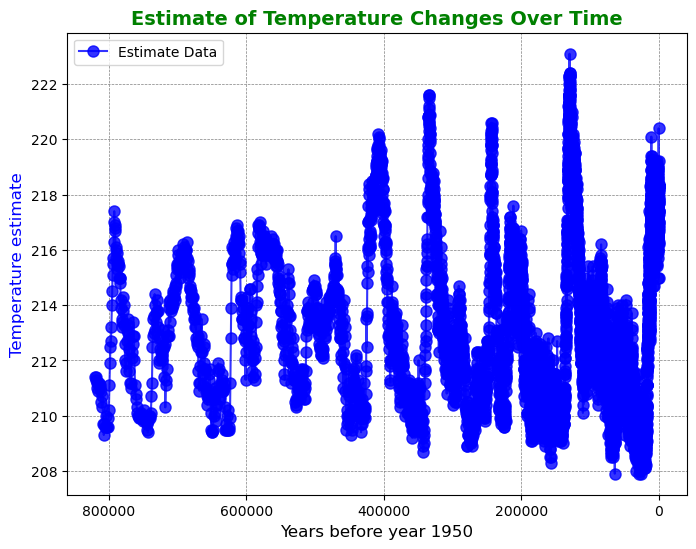

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temp_estimate, marker="o", linestyle="-", color="blue", markersize=8, label="Estimate Data", alpha=0.8)
plt.xlabel("Years before year 1950", fontsize=12,)
plt.ylabel("Temperature estimate", fontsize=12, color="blue")
plt.title("Estimate of Temperature Changes Over Time", fontweight="bold", fontsize=14, color="green")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.legend()
plt.gca().invert_xaxis() # Invert the x axis
plt.show()

The graph shows an oscillatory behavior with 5 peaks that stand out from the general trend in the graph.  
After analyzing the temperature, let us move on to analyze CO2.

In [5]:
# Read data from CO2 data from IPCC Report

co2_file_path = "data\CO2 data from IPCC Report.xls"
co2_df = pd.read_excel(co2_file_path,sheet_name=2,skiprows=14)  
co2_df.head()

,year,CO2,sigma mean CO2
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


1) CO2 (ppmv): This column probably represents the actual concentration of carbon dioxide in parts per million at a specific point in time or over a given period. These values are the actual or estimated measurements of CO2.  

2) Sigma mean CO2 (ppmv): This column, on the other hand, could represent the uncertainty or standard deviation of average CO2 measurements.  
In science and statistics, "sigma" generally refers to standard deviation, which is a measure of how much values vary in a data set.  

3) year indicates the age or time elapsed from a specific gas sample to the present.  

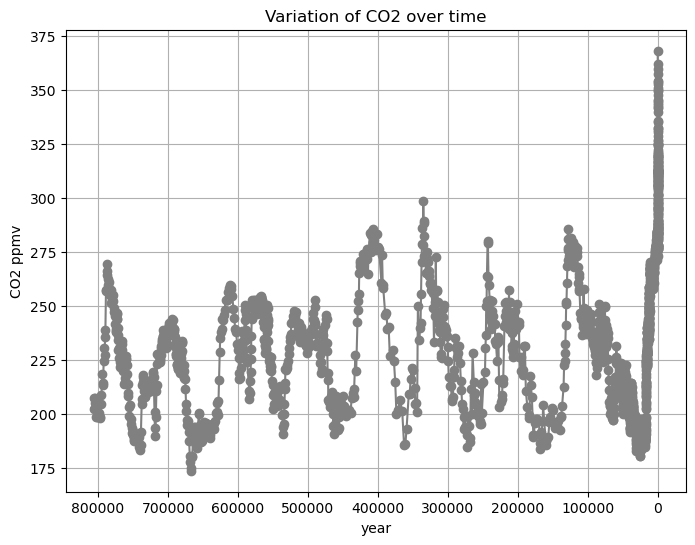

In [6]:
gas_year = co2_df["year"]
CO2_values = co2_df["CO2"]

plt.figure(figsize=(8, 6))
plt.plot(gas_year, CO2_values, marker="o", linestyle="-", color="gray")
plt.xlabel("year")
plt.ylabel("CO2 ppmv")
plt.title("Variation of CO2 over time")
plt.grid(True)
plt.gca().invert_xaxis() 
plt.show()

As can be seen in this graph, CO2 for tens of thousands of years has been oscillating between 275 ppmv and 200 ppmv until the irruption of the human being and the industrial revolution, where the ppmv skyrockets.

Once seen the evolution of co2 and temperature,analyse CO2 vs Temperature Anomaly from 800kyrs - present.

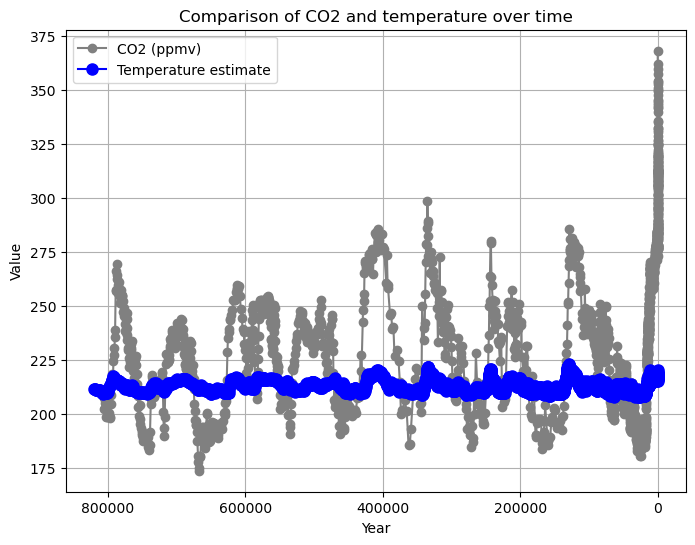

In [7]:
plt.figure(figsize=(8, 6))

# plot CO2
plt.plot(gas_year, CO2_values, marker="o", linestyle="-", color="gray", label="CO2 (ppmv)")

# Plot temperature
plt.plot(edc3_age, temp_estimate, marker="o", linestyle="-", color="blue", markersize=8, label="Temperature estimate")

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Comparison of CO2 and temperature over time")
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis() 
plt.show()

While CO2 increased almost exponentially, such drastic changes in temperature are hardly noticeable.

***

## References

[1] Lüthi, D., Le Floch, M., Bereiter, B., Blunier, T., Barnola, J.-M., Siegenthaler, U., Raynaud, D., Jouzel, J., Fischer, H., Kawamura, K.,        Stocker, T.F., 2008. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382  
https://www.nature.com/articles/nature06949

[2] WWF, WWf authors. https://wwf.panda.org/es/cambio_climatico1/importanciaclimatica/  

[3] Jouzel, Jean; Masson-Delmotte, Valerie (2007): EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA, https://doi.pangaea.de/10.1594/PANGAEA.683655  

[4] Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.  

[5] Pandas developers. pandas.read_excel https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
